Each row in the train.csv and test.csv dataset is one visit to the store.

train.csv - contains user transactions from August 1st 2016 to April 30th 2018.
test.csv - contains user transactions from May 1st 2018 to October 15th 2018.

Because we are predicting the log of the total revenue per user, be aware that not all rows in test.csv will correspond to a row in the submission, but all unique fullVisitorIds will correspond to a row in the submission.

We're trying to predict the log of the total revenue per user for the period of December 1st 2018 to January 31st 2019.

## In this Notebook we would be performing the EDA(Exploratory data analysis) in order to understand the Data and Identify Hidden patterns. This analysis will guide us in Feature selection

In [ ]:
#import all the required libraries 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import numpy as np
import json
import gc
from datetime import datetime
from pandas.io.json import json_normalize
import seaborn as sns

In [ ]:
#import the dataset
data = pd.read_csv("train.csv",dtype={'fullVisitorId': 'str'},low_memory=False)
data_test = pd.read_csv("test.csv",dtype={'fullVisitorId': 'str'},low_memory=False)


In [ ]:
#print shape and view the top 5 rows of train dataset
print(data.shape)
data.head()

(903653, 12)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [ ]:
#print shape and view the top 5 rows of test dataset
print(data_test.shape)
data_test.head()

(804684, 12)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6059383810968229466,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2376720078563423631,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2314544520795440038,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


In [ ]:
data.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 12 columns):
 #   Column  

In [ ]:
def remove_columns(data,columns):
        """
                Method Name: remove_columns
                Description: This method removes the given columns from a pandas dataframe.
                Output: A pandas DataFrame after removing the specified columns.
                On Failure: Raise Exception
             
        """
        
        try:
            useful_data=data.drop(labels=columns, axis=1) # drop the labels specified in the columns
            return useful_data
        
        except Exception as e:
            raise Exception()

In [ ]:
#This method encode the date column to multiple seperate columns for Year, Month, Day etc
def encode_date(df):
        """
                Method Name: encode_date
                Description: This method encode the date column to dataframe consisting Year', 'Month', 'Day', 'Week', 'Dayofweek', 'Dayofyear' etc.
                Output: A pandas DataFrame after converting date column to dataframe.
                On Failure: Raise Exception
                
        """
    
        try:
            fld = pd.to_datetime(df['date'].astype(str), format='%Y/%m/%d' ,infer_datetime_format=True)
            attrs = ['Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear']
            
            for attr in attrs:
                df['Date_'+attr] = getattr(fld.dt,attr.lower())
            
        except Exception as e:
            raise Exception("Not able to Convert date column to dataframe")
        
        finally:
            return df

In [ ]:
def remove_special_char (df, column):
    """
                Method Name: remove_special_char
                Description: This method removes special character from dataframe column
                Output: A pandas DataFrame after removing special character.
                On Failure: Raise Exception

                
        """
    try:
        spec_chars = ["_"]
        for char in spec_chars:
            df["sessionId"] = df["sessionId"].str.replace(char, ' ')
        return df
    
    except Exception as e:
            raise Exception()


In [ ]:
#encode the date column to multiple columns for train dataset
data = encode_date(data) 
data['date'] = pd.to_datetime(data['date'].astype(str), format='%Y%m%d')
data['visitStartTime_cd'] = pd.to_datetime(data['visitStartTime'],unit='s')
#encode the date column to multiple columns for test dataset
data_test = encode_date(data_test) 
data_test['date'] = pd.to_datetime(data_test['date'].astype(str), format='%Y%m%d')


data_test['visitStartTime_cd'] = pd.to_datetime(data_test['visitStartTime'],unit='s')


In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Dayofyear,visitStartTime_cd
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016,9,2,4,246,2016-09-02 15:33:05
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016,9,2,4,246,2016-09-03 05:22:27
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016,9,2,4,246,2016-09-03 01:16:26
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,2016,9,2,4,246,2016-09-03 05:40:13
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,2016,9,2,4,246,2016-09-02 13:23:20


In [ ]:
def json_flatten (data,json_columns):
    """
                Method Name: json_flatten
                Description: This method converts json string representation of dictionary to a python dataframe column and drops the main column
                Output: A pandas DataFrame after flattening the json fields
                On Failure: Raise Exception
                
    """
    try:
        for column in json_columns:
            column_to_df= json_normalize([json.loads(x) for x in data[column]])
            data= data.drop(column, axis=1).merge(column_to_df, right_index=True, left_index=True)
        return data
    
    except Exception as e:
            raise Exception()
    


In [ ]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
data = json_flatten (data , json_columns)
data_test = json_flatten (data_test , json_columns)



<ipython-input-9-72103b89806d>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  column_to_df= json_normalize([json.loads(x) for x in data[column]])


In [ ]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Dayofyear,visitStartTime_cd,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,2016,9,2,4,246,2016-09-02 15:33:05,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,2016,9,2,4,246,2016-09-03 05:22:27,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,2016,9,2,4,246,2016-09-03 01:16:26,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,2016,9,2,4,246,2016-09-03 05:40:13,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availabl

In [ ]:
data["transactionRevenue"].astype('float').fillna(0).unique()

data['pageviews'] = data['pageviews'].astype('float')
data['pageviews'].fillna(0,inplace=True)
    
data_test['pageviews'] = data_test['pageviews'].astype('float')
data_test['pageviews'].fillna(0,inplace=True)        

# Target Variable Analysis

We are supposed to predict the natural log of sum of all transactions per user. 
Scatter Plot of the log(sum of transaction revenue per user)

    
The following plot shows that less than 2% of the customers produce more than 90% of the revenue. 
Identifying the appropriate channels is very important for making marketing investments  


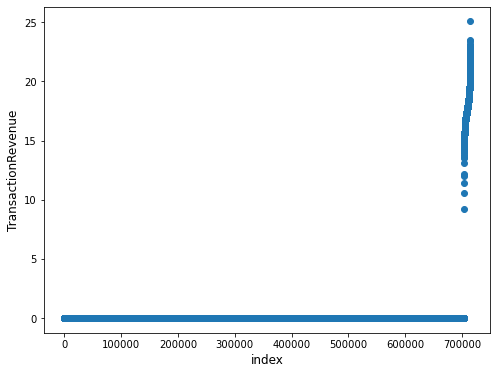

In [ ]:

data["transactionRevenue"] = data["transactionRevenue"].astype('float')
gdf = data.groupby("fullVisitorId")["transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()


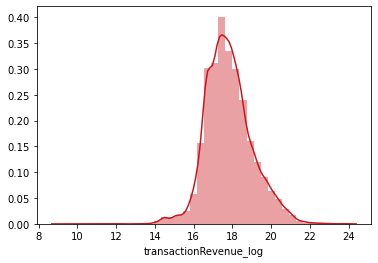

In [ ]:
data['transactionRevenue_log']=np.log(data[data['transactionRevenue'] > 0]["transactionRevenue"])
sns.distplot(data['transactionRevenue_log'], bins=40,color='#c9161c')


From the above graph it is clear that only a small amount of users contribute towards the revenue generated.
Now lets check the skewness ( to check if distribution) and kurtosis ( tails) of the transaction revenue. 

In [ ]:
from scipy.stats import kurtosis, skew 
print('Kurtosis (ideally should be 0, high kurtosis means too many outliers): {}'.format(kurtosis(data[data['transactionRevenue_log'] > 0]["transactionRevenue_log"])))
print( 'Skewness (range between -0.5 and +0.5 is fairly symmetrical): {}'.format(skew((data[data['transactionRevenue_log'] > 0]["transactionRevenue_log"]))))

Kurtosis (ideally should be 0, high kurtosis means too many outliers): 1.161030847371089
Skewness (range between -0.5 and +0.5 is fairly symmetrical): 0.33752145333061995


### Data looks fairly symmetrical skewed (0.3) . But the kurtosis (1.16) is high showing outliers 

In [ ]:
# Checking the outliers
revenue_generating_customer_transactions = data[data['transactionRevenue_log']>0]
sns.set(rc={'figure.figsize':(20,10)})

ax = sns.boxplot( x='browser', y="transactionRevenue_log", data=revenue_generating_customer_transactions)

outliers=[]
def List_outliers(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = List_outliers(revenue_generating_customer_transactions['transactionRevenue'])
print(outlier_datapoints)


NameError: ignored

### Significant outliers for the browsers Chrome, Safari and Firefox. We can't remove any outliers because the number of records with target variable is extremely low.

In [ ]:
#data["transactionRevenue"]=data["transactionRevenue"].fillna(0, inplace=True)
df_notnullrev = (data["transactionRevenue_log"]>0).sum()

df_revpervisitor = data.groupby("fullVisitorId")["transactionRevenue_log"].sum()

df_notnullrev_visitor = df_revpervisitor.where(df_revpervisitor>0).count()
print("Number of instances in train set with non-zero revenue : ", df_notnullrev, " and ratio is : ", df_notnullrev / data.shape[0])
print("Number of unique customers with non-zero revenue : ", df_notnullrev_visitor, "and the ratio is : ", df_notnullrev_visitor / df_revpervisitor.shape[0])


NameError: ignored

### Less than 2% of records have target variable value 
The ratio of Revenue generating customers to customers with no revenue is 1.3%. Since most of the rows have zero revenues, in the following plots let us have a look at the count of each category of the variable along with the number of instances where the revenue is not zero.


In [ ]:
data.info()

NameError: ignored

### There are quite some columns which have constant values, The following code will drop them from our feature list to save memory and improve processing time

In [ ]:
# Delete the columns from test and train dataset which have only 1 unique value

for col in data.columns:
    if data[col].nunique()==1:
        #print('number of unique values for', col ,'={}'.format(df[col].nunique()))
        data=data.drop(col,axis=1)

for col in data_test.columns:
    if data_test[col].nunique()==1:
        #print('number of unique values for', col ,'={}'.format(df[col].nunique()))
        data_test=data_test.drop(col,axis=1)
        

In [ ]:
# checking if there are missing columns in test or train. 
# From the below we see that only transactionRevenue is missing in test dataset which is as expected


print('missing_cols_in_test', set( data.columns ) - set( data_test.columns ))
print('missing_cols_in_train',  set( data_test.columns ) - set( data.columns ))

missing_cols_in_test {'transactionRevenue_log', 'transactionRevenue'}
missing_cols_in_train set()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   channelGrouping                 903653 non-null  object        
 1   date                            903653 non-null  datetime64[ns]
 2   fullVisitorId                   903653 non-null  object        
 3   sessionId                       903653 non-null  object        
 4   visitId                         903653 non-null  int64         
 5   visitNumber                     903653 non-null  int64         
 6   visitStartTime                  903653 non-null  int64         
 7   Date_Year                       903653 non-null  int64         
 8   Date_Month                      903653 non-null  int64         
 9   Date_Day                        903653 non-null  int64         
 10  Date_Dayofweek                  903653 non-null  int64  

## Analysis based on the Date Dimension

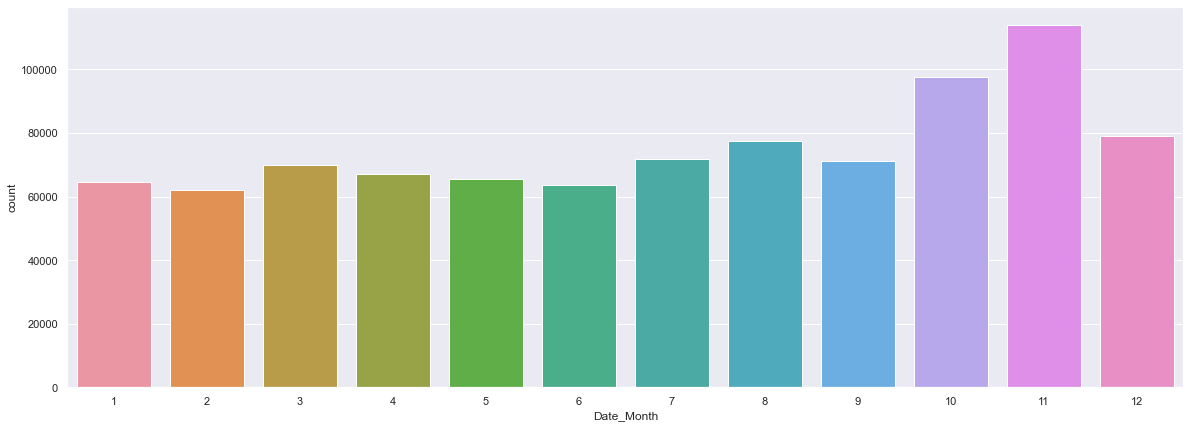

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(data['Date_Month'])

### Interestingly the visits are increasing during the last quarter of the year. 
The Year, Day plots do not show any significant observation. So excluding them from analysis. 

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(data['Date_Dayofweek'])

NameError: ignored

### The visits are higher on weekdays rather than on weekends. The highest being the middle of the week - Tuesday, Wednesday and Thursday. 
It would be sensible to have targeted the marketing spend on these days over the second half of the calendar year.

In [ ]:
# Checking the Revenue based on the hour of the day
data["Hour"] = data['visitStartTime_cd'].apply(lambda x:x.hour)

NameError: ignored

In [ ]:
day_dict=dict(data.groupby(['Hour']).sum()["transactionRevenue_log"])
plt.plot(list(day_dict.keys()),list(day_dict.values()))
plt.plot(list(day_dict.keys()),[np.mean(list(day_dict.values()))]*len(list(day_dict.keys())))
plt.title('Hour V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('hour')
plt.xticks(rotation=90)
plt.show()

NameError: ignored

### Hour V/S Total Revenue
- This here show the total revenue generated on hourly basis.
- 1) One important observation that can be seeb from the graph is that, i between 16:00 hrs and 18:00 hrs, we can see the maximum revenue generated.
- 2) Another thing that can be seen is that during morning and afternoon timings, in between 10:00AM and 13:00 hrs, the revenue generated is least.        

In [ ]:
date_sales = ['Hour', 'Date_Dayofweek'] 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[date_sales[0]], data[date_sales[1]], 
            values=data["transactionRevenue_log"], aggfunc=[np.sum]).style.background_gradient(cmap = cm)


### When we plot the Hour of the day Vs the Day of the week, we can see that from 17 to 20 hour for the days  Tuesday, Wed and Thursday we have the maximum revenue.  

## Geographical Analysis


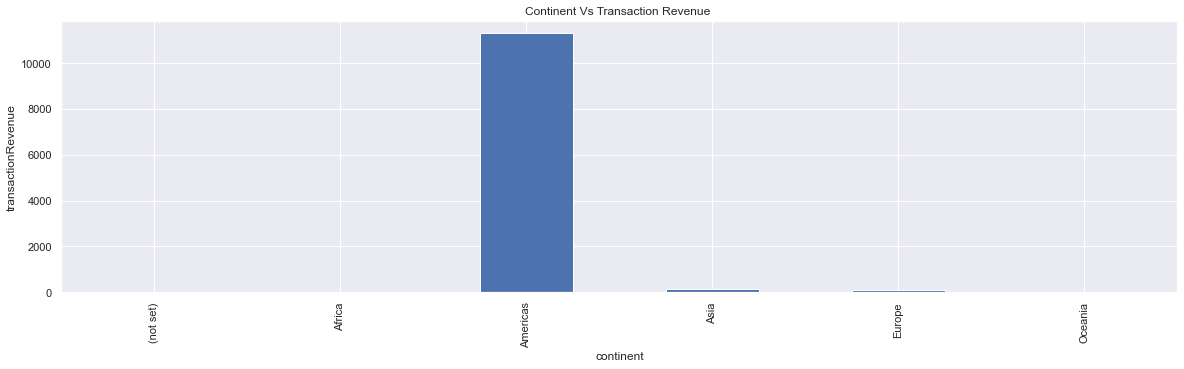

In [ ]:
data.groupby('continent')['transactionRevenue_log'].count().plot.bar()
plt.xlabel('continent')
plt.ylabel('transactionRevenue')
plt.title('Continent Vs Transaction Revenue ')
plt.show()


### Looks like American Continent has the highest revenue contribution. Lets drill down further to view based on the subcontinent / country / cities to understand the main revenue generating geographies for investing in marketing activities

In [ ]:
print("Description of top 15 SubContinents count: ")
print(data['subContinent'].value_counts()[:10]) 
#data_subcontinentrev = data.groupby("subContinent")["transactionRevenue"].sum()
#data_per = data_subcontinentrev.groupby('subContinent').agg(percentage =('transactionRevenue', lambda p: p.sum() / data.sum() * 100)).round(2)
#data_per

Description of top 15 SubContinents count: 
Northern America    390657
Southeast Asia       77800
Southern Asia        59321
Western Europe       59114
Northern Europe      58168
Eastern Asia         46919
Eastern Europe       45249
South America        41731
Western Asia         38443
Southern Europe      35780
Central America      15583
Australasia          14893
Northern Africa       7683
Western Africa        2573
Caribbean             2406
Name: subContinent, dtype: int64


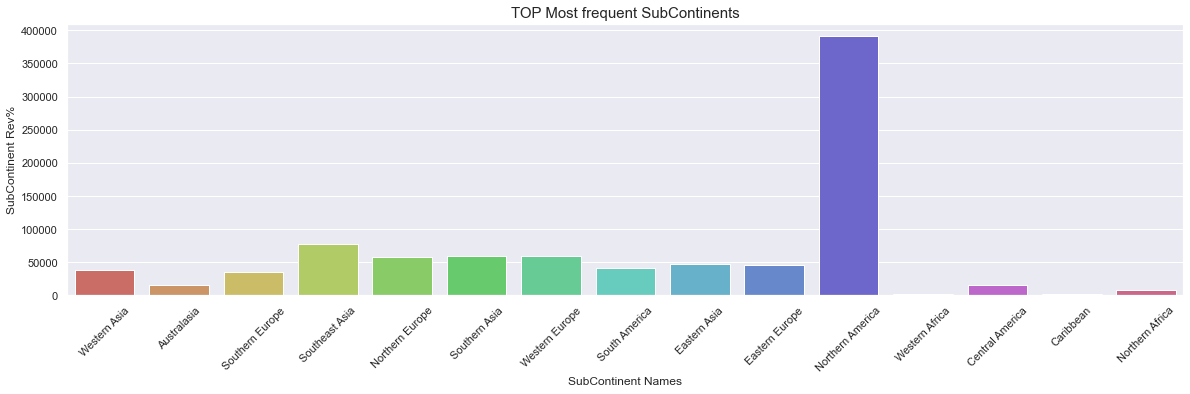

In [ ]:
sns.countplot(data[data['subContinent'].isin(data['subContinent'].value_counts()[:15].index.values)]['subContinent'], palette="hls")
plt.title("TOP Most frequent SubContinents", fontsize=15) 
plt.xlabel("SubContinent Names", fontsize=12) 
plt.ylabel("SubContinent Rev%", fontsize=12) 
plt.xticks(rotation=45) 

plt.show()

### Northern America followed by South East Asia have the highest visits. The top 5 regions are accounting to more than 70% of the customers


Top 15 Countries with highest visits: 
United States     364744
India              51140
United Kingdom     37393
Canada             25869
Vietnam            24598
Turkey             20522
Thailand           20123
Germany            19980
Brazil             19783
Japan              19731
France             15832
Mexico             13225
Taiwan             12996
Australia          12698
Russia             11662
Name: country, dtype: int64


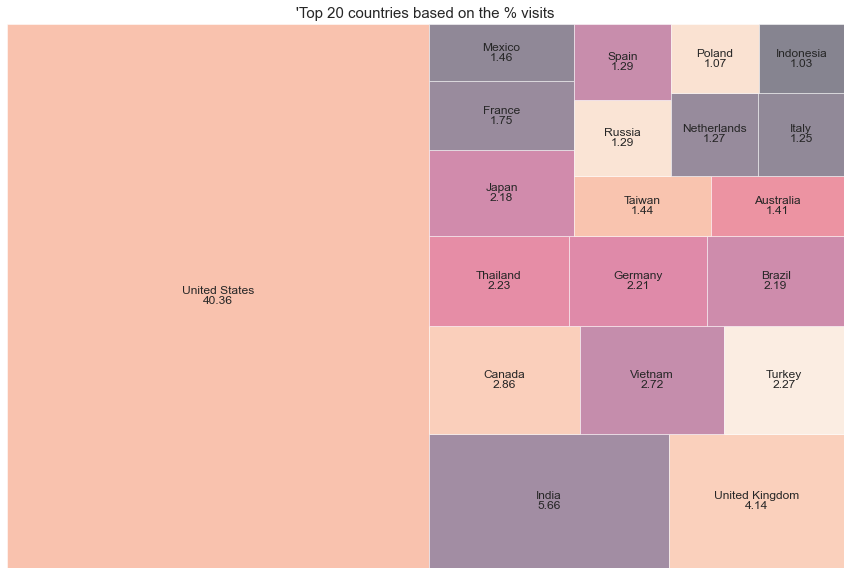

In [ ]:
# Using squarify library for treemap for GeoNetwork analysis 
import squarify

print("Top 15 Countries with highest visits: ")
print(data["country"].value_counts()[:15]) 

treemap = round((data["country"].value_counts()[:20] / len(data['country']) * 100),2)

plt.figure(figsize=(15,10))
g = squarify.plot(sizes=treemap.values, label=treemap.index, value=treemap.values, alpha=0.5)
g.set_title("'Top 20 countries based on the % visits",fontsize=15)
g.set_axis_off()
plt.show()

### USA has highest values of 40%, Followed by India and UK. Let us check the visits per city to get a better idea about geographical presence 

In [ ]:
print("Top 15 Cities with highest visits: ")
print(data["city"].value_counts()[:15]) 

data.loc[data["city"] == "not available in demo dataset", 'city'] = np.nan

treemap = round((data["city"].value_counts()[:20] / len(data['city']) * 100),2)

plt.figure(figsize=(15,10))
g = squarify.plot(sizes=treemap.values, label=treemap.index, value=treemap.values, alpha=0.5)
g.set_title("'Top 20 cities based on the % visits",fontsize=15)
g.set_axis_off()
plt.show()

Top 15 Cities with highest visits: 


NameError: ignored

### Majority of the American cities have the highest visits as expected.  
### But we have to check if the visits are in line with the revenue generating customers 

## Analysing Source


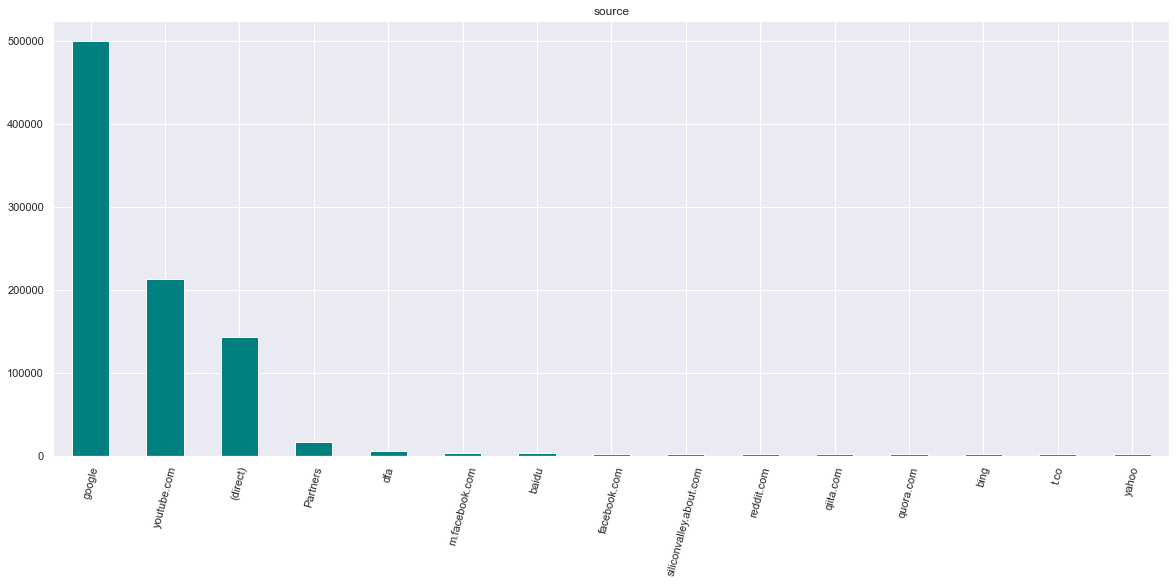

In [ ]:

fig,axes = plt.subplots(1,1,figsize=(20,8))
data["source"].value_counts().head(15).plot(kind="bar",ax=axes,title="source",rot=75,color="teal")

### As per the source diagram, google is the most repetitive source. 

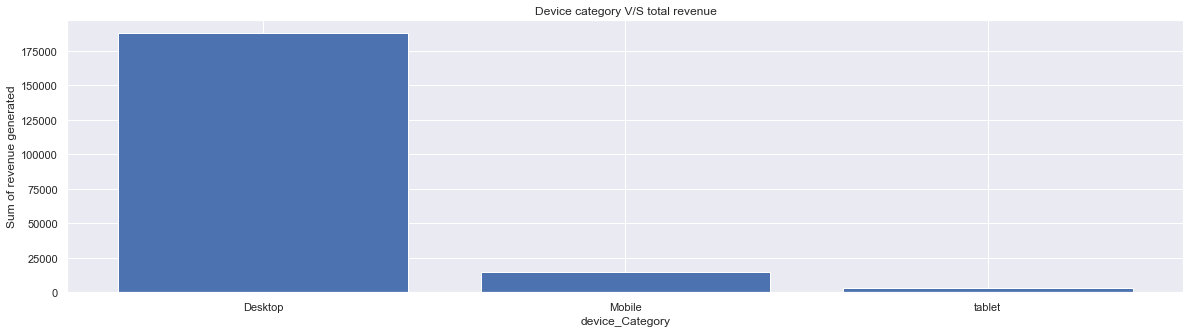

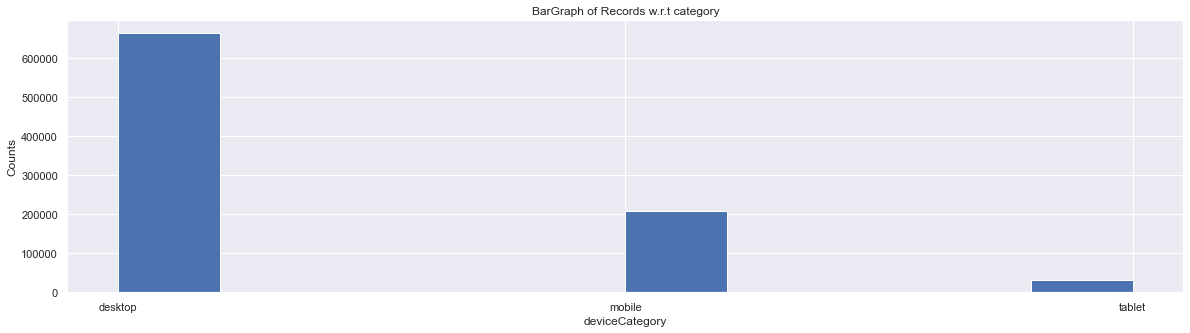

In [ ]:
# matplotlib bargraph
category = ["Desktop","Mobile","tablet"]
plt.bar(category,data.groupby(["deviceCategory"]).sum()["transactionRevenue_log"].values)


plt.title('Device category V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('device_Category')
plt.show()

# matplotlib bargraph
plt.hist(data["deviceCategory"])


plt.title('BarGraph of Records w.r.t category')
plt.ylabel('Counts')
plt.xlabel('deviceCategory')
plt.show()


### Interesting to observe that the mobile revenue per visit is lower compared to the desktop revenue per visit as per the bar graph. This shows that the value of per visit is much higher in desktop. 

## Browser Analysis 
Here now we are trying to get relation in between different browsers that a customer is using for making an purchase, thereby generating transaction revenue.
Firstly, we need to figure out the browsers that are found and then trying to plot it with respect to transaction revenue generated by each device browser.

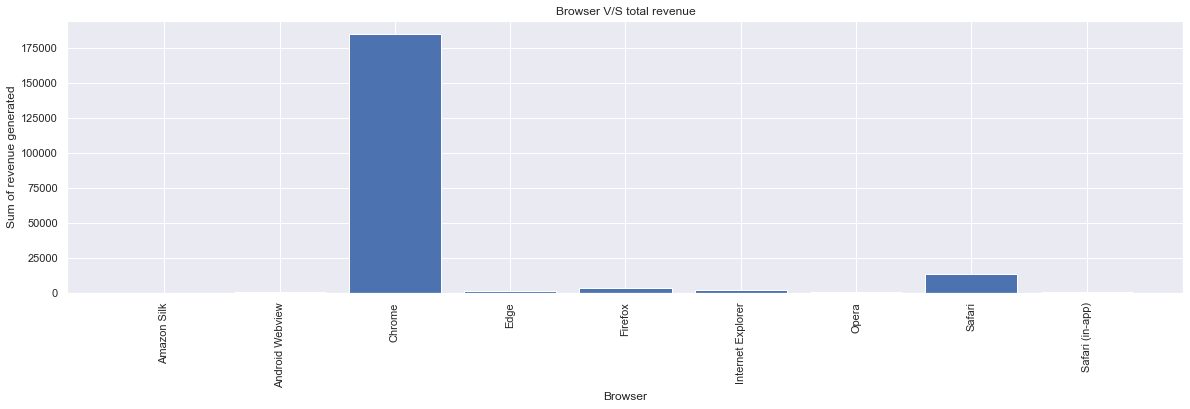

In [ ]:
browser = dict(data.groupby(["browser"]).sum()["transactionRevenue_log"])
browser =  dict( (key, value) for (key, value) in browser.items() if value >0 )

# matplotlib bargraph

plt.bar(browser.keys(),browser.values())


plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('Browser')
plt.xticks(rotation=90)
plt.show()

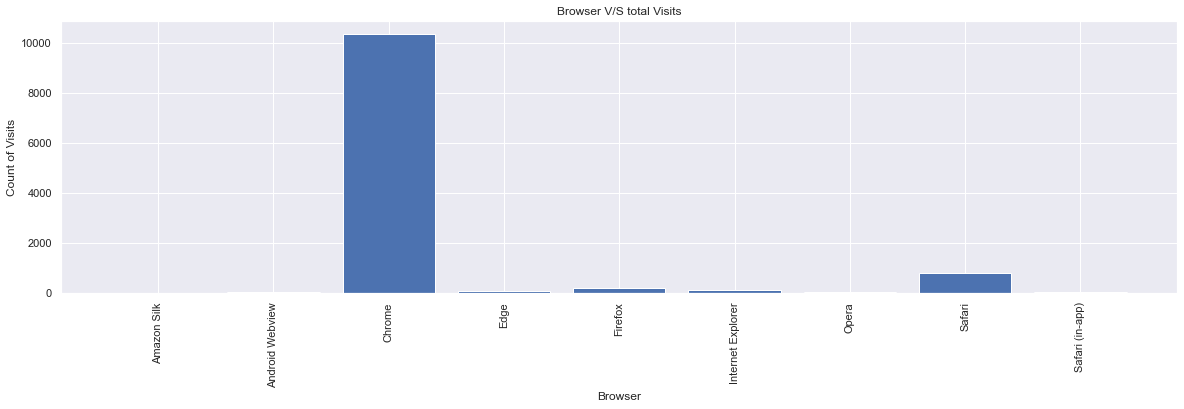

In [ ]:
browser = dict(data.groupby(["browser"]).count()["transactionRevenue_log"])
browser =  dict( (key, value) for (key, value) in browser.items() if value >0 )

# matplotlib bargraph

plt.bar(browser.keys(),browser.values())


plt.title('Browser V/S total Visits')
plt.ylabel('Count of Visits')
plt.xlabel('Browser')
plt.xticks(rotation=90)
plt.show()

### From the above figure, it is clearly visible that most of the revenue generated is coming from Chrome Browser, followed by safari and firefox. The visits are in line with the revenue generated 

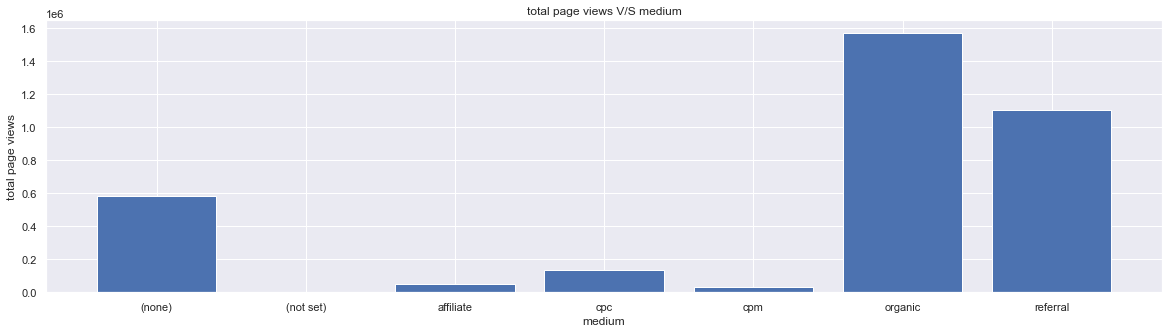

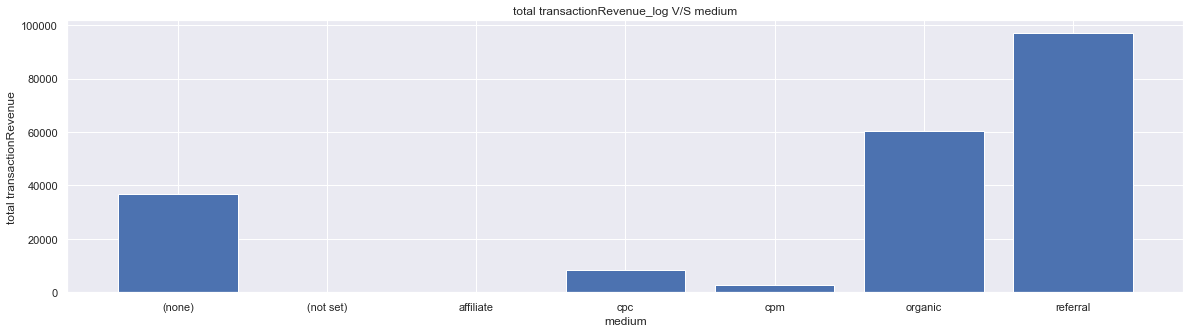

In [ ]:
pviews = dict(data.groupby(["medium"]).sum()["pageviews"])
pviews.keys(),pviews.values()
plt.bar(pviews.keys(),pviews.values())
plt.title('total page views V/S medium')
plt.ylabel('total page views')
plt.xlabel('medium')
plt.show()

pviews = dict(data.groupby(["medium"]).sum()["transactionRevenue_log"])
pviews.keys(),pviews.values()
plt.bar(pviews.keys(),pviews.values())
plt.title('total transactionRevenue_log V/S medium')
plt.ylabel('total transactionRevenue')
plt.xlabel('medium')
plt.show()


### Referrals Medium have the highest conversion. The number of organic views are higher but the revenue generated by a single referral visit is much higher than than the organic visit. This shows that referral is a better way of attracting customers

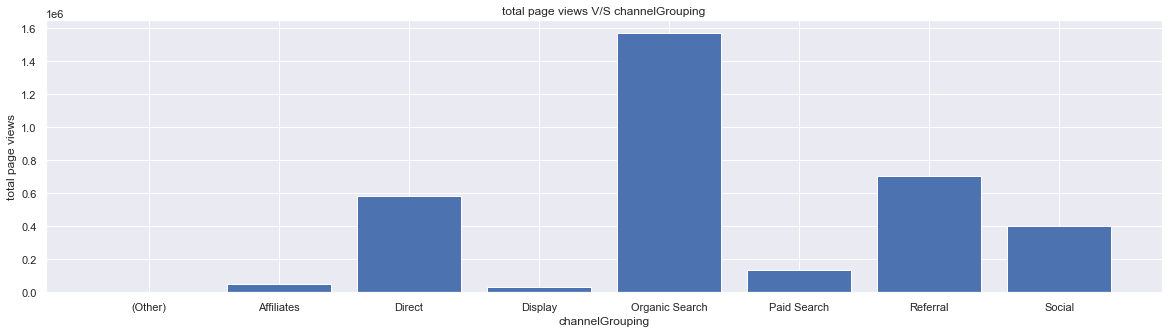

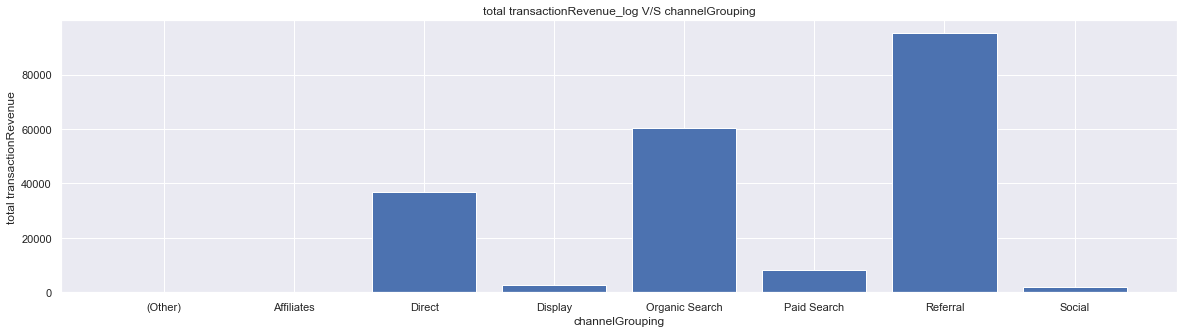

In [ ]:
pviews = dict(data.groupby(["channelGrouping"]).sum()["pageviews"])
pviews.keys(),pviews.values()
plt.bar(pviews.keys(),pviews.values())
plt.title('total page views V/S channelGrouping')
plt.ylabel('total page views')
plt.xlabel('channelGrouping')
plt.show()

pviews = dict(data.groupby(["channelGrouping"]).sum()["transactionRevenue_log"])
pviews.keys(),pviews.values()
plt.bar(pviews.keys(),pviews.values())
plt.title('total transactionRevenue_log V/S channelGrouping')
plt.ylabel('total transactionRevenue')
plt.xlabel('channelGrouping')
plt.show()


### Similar to the analysis done on the Medium, In channel grouping as well Referrals have the highest conversion. The number of organic search view are higher but the revenue generated by a single referral visit is much higher than than the organic visit. This shows that referral is a better way of attracting customers

## Operating System Analysis

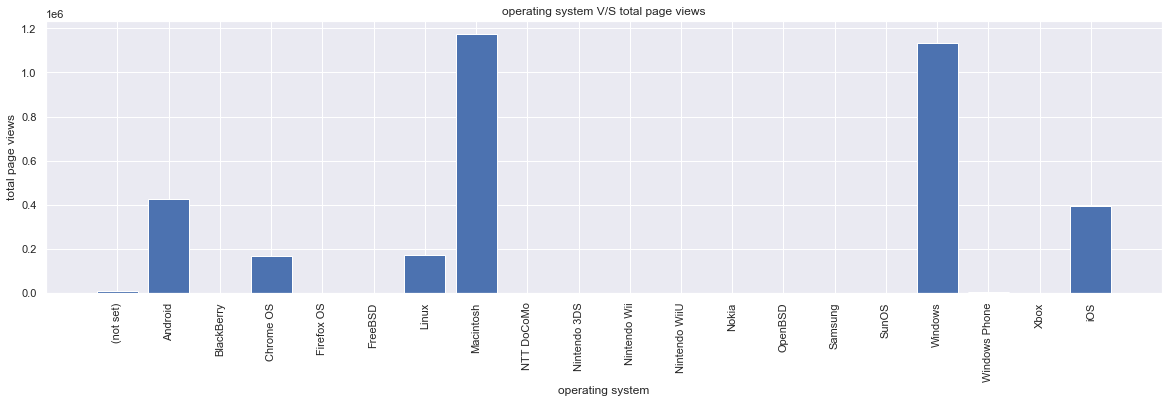

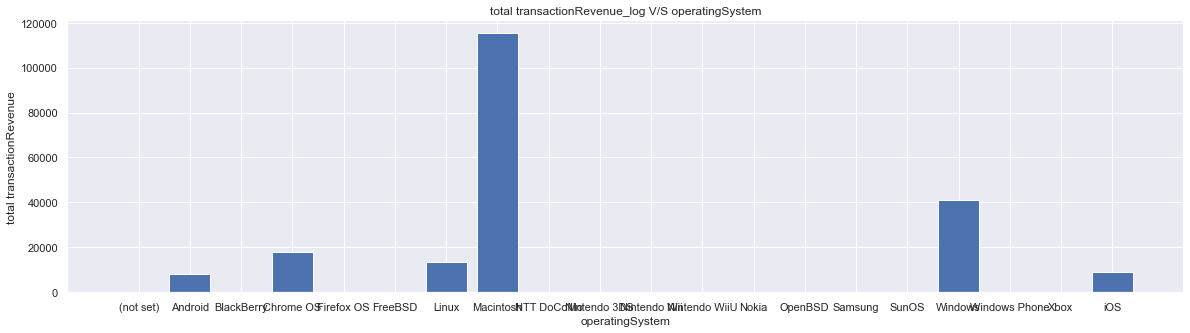

In [ ]:
operatingsystem = dict(data.groupby(["operatingSystem"]).sum()["pageviews"])
operatingsystem.keys(),operatingsystem.values()
plt.bar(operatingsystem.keys(),operatingsystem.values())
plt.title('operating system V/S total page views')
plt.ylabel('total page views')
plt.xlabel('operating system')
plt.xticks(rotation=90)
plt.show()


pviews = dict(data.groupby(["operatingSystem"]).sum()["transactionRevenue_log"])
pviews.keys(),pviews.values()
plt.bar(pviews.keys(),pviews.values())
plt.title('total transactionRevenue_log V/S operatingSystem')
plt.ylabel('total transactionRevenue')
plt.xlabel('operatingSystem')
plt.show()

### It can be observed from the above graphs that Macintosh is the most preferred Operating system. The revenue is higher and is proportionate to the page views. On the other hand, Windows which has similar page views has Machintosh has very low conversion leading to lower revenue. 


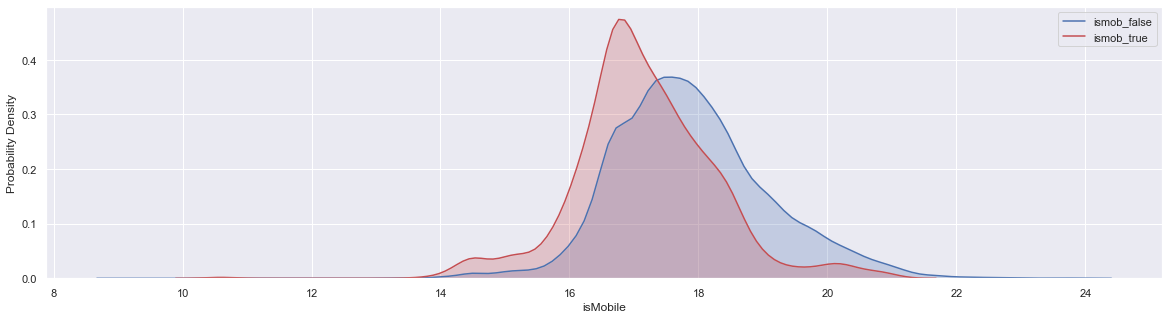

In [ ]:
ismob_false = data[data["isMobile"]==False]["transactionRevenue_log"]
ismob_true = data[data["isMobile"]==True]["transactionRevenue_log"]


sns.kdeplot(ismob_false, color='b', shade=True, Label='ismob_false')
sns.kdeplot(ismob_true, color='r', shade=True, Label='ismob_true') 
  
# Setting the X and Y Label 
plt.xlabel('isMobile') 
plt.ylabel('Probability Density') 
plt.legend()
plt.show()

### The probability density function shows that the mobile channel has higher probability of generating revenue compared to other channels

In [ ]:
#Relationship betweem categorical features and Revenue
categorical_features=['channelGrouping','device.operatingSystem','device.deviceCategory', 'geoNetwork.continent', 'geoNetwork.subContinent', 'trafficSource.campaign', 'trafficSource.medium']

for feature in categorical_features:
    data=train_clean.copy()
    data.groupby(feature)['totals.transactionRevenue'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('transactionRevenue')
    plt.title(feature)
    plt.show()
